## Problem Statement
To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes .

In [2]:
#Important Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Preprocessing , Normalizing 
from sklearn.preprocessing import StandardScaler

#Models

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier

#Metrics 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\sharm\Downloads\cardio_train.csv",sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
print(df.shape)

(70000, 13)


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


##### Observation
No Missing Values

Assuming Age is in Number of Days

Outliers in Height

Outliers in systolic Blood Pressure ap_hi

Outliers in ap_lo

See cholesterol and glucose are binary will see in the further.

In [12]:
df.drop('id',axis=1,inplace=True)

df.drop_duplicates(inplace=True)

In [14]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [17]:
df.shape

(69976, 12)

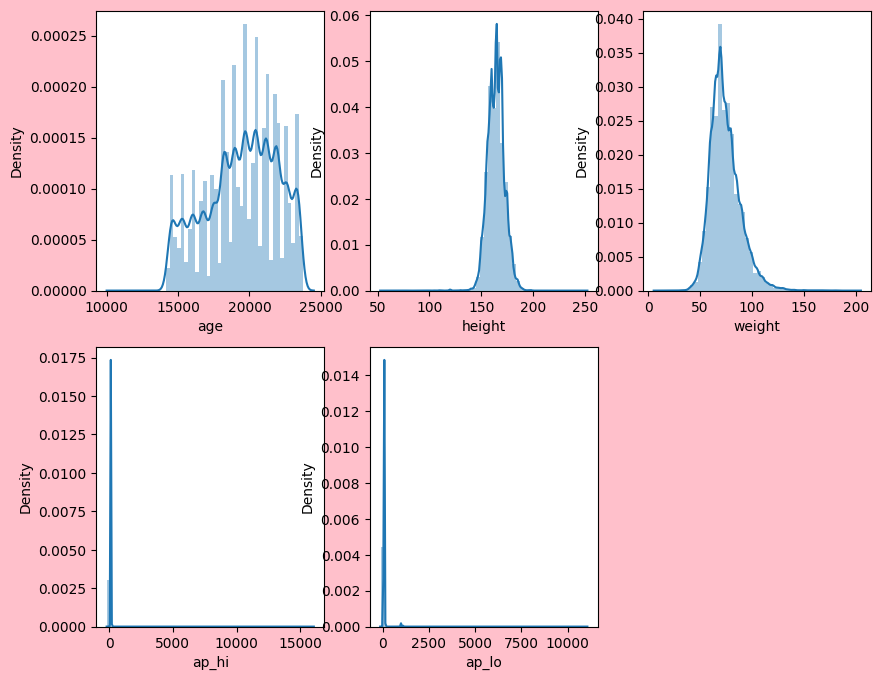

In [21]:
plt.figure(figsize=(10,8),facecolor='pink')
plotnumber=1
for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

## Z Distribution/Statistics
Lets tranform our Model distribution into Z Distribution (Standard Normal Distribution)

Where mean=0 and Std =1

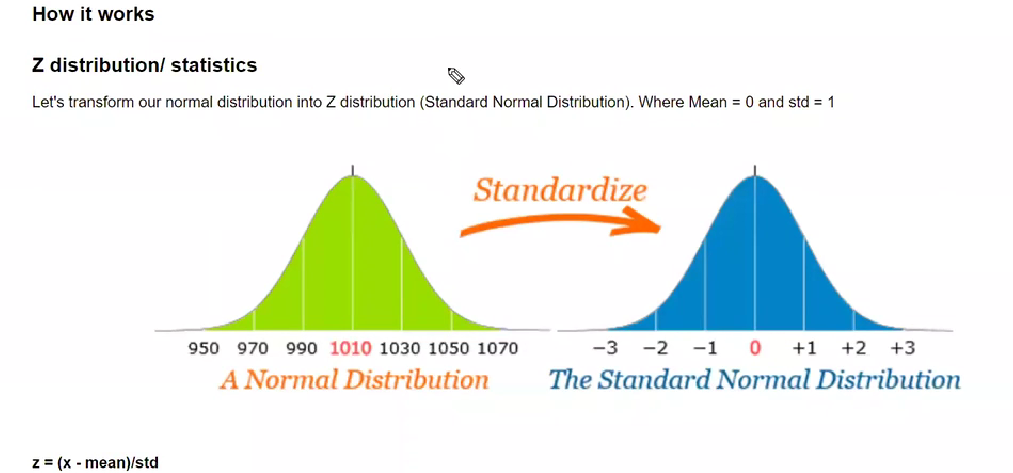

Q: How does converting data into a Standard Normal Distribution help us?

Ans: Converting data into a Standard Normal Distribution transforms the data in such a way that the mean becomes 0 and the standard deviation becomes 1. This standardization helps us identify outliers, as they will lie at the extreme ends of the distribution, typically beyond +3 or -3 on the z-score scale.

By standardizing the data, the entire dataset is normalized, making it easier to analyze. To select the most relevant data, we can filter out the extreme values (outliers) and retain the data within a specific range, which often corresponds to a high percentage of the total data. For example, selecting data within ±3 standard deviations would cover approximately 99.7% of the data, ensuring that we retain the majority of the useful information while excluding outliers.



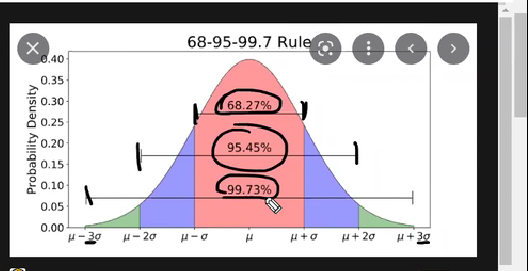

Q: Is it standard to select data within 3 standard deviations?

Ans: Most of the time, we use 3 standard deviations, as it covers approximately 99.7% of the data. However, it is not a strict or standard rule to always use 3 standard deviations.

For instance, if you decide to use 2 standard deviations, you will exclude about 5% of the data, as it only covers approximately 95.45% of the total data.



In [30]:
#With sid 3, lets see the stats 
#From scipy import stats 
#zscore=(x_mean)/std=>you have seen this is Standard Scaler 

#Z=(x-mean)/std
from scipy.stats import zscore


z_score=zscore(df[['age','height','ap_hi','weight','ap_lo']])
#abs=absolute value
abs_z_score=np.abs(z_score)  #apply the formula and you get the scaled data 
#range of std btw 3 to -3
#axis=1 --> column wise
filtering_entry=(abs_z_score < 3).all(axis=1)
df=df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000
mean,19466.951531,1.347339,164.372441,73.569152,126.173552,81.288053,1.362153,1.223609,0.087239,0.053187,0.803712,0.492938
std,2467.016002,0.476128,7.692655,13.202960,17.854738,10.235287,0.677132,0.569561,0.282187,0.224408,0.397192,0.499954
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#api max value minimised

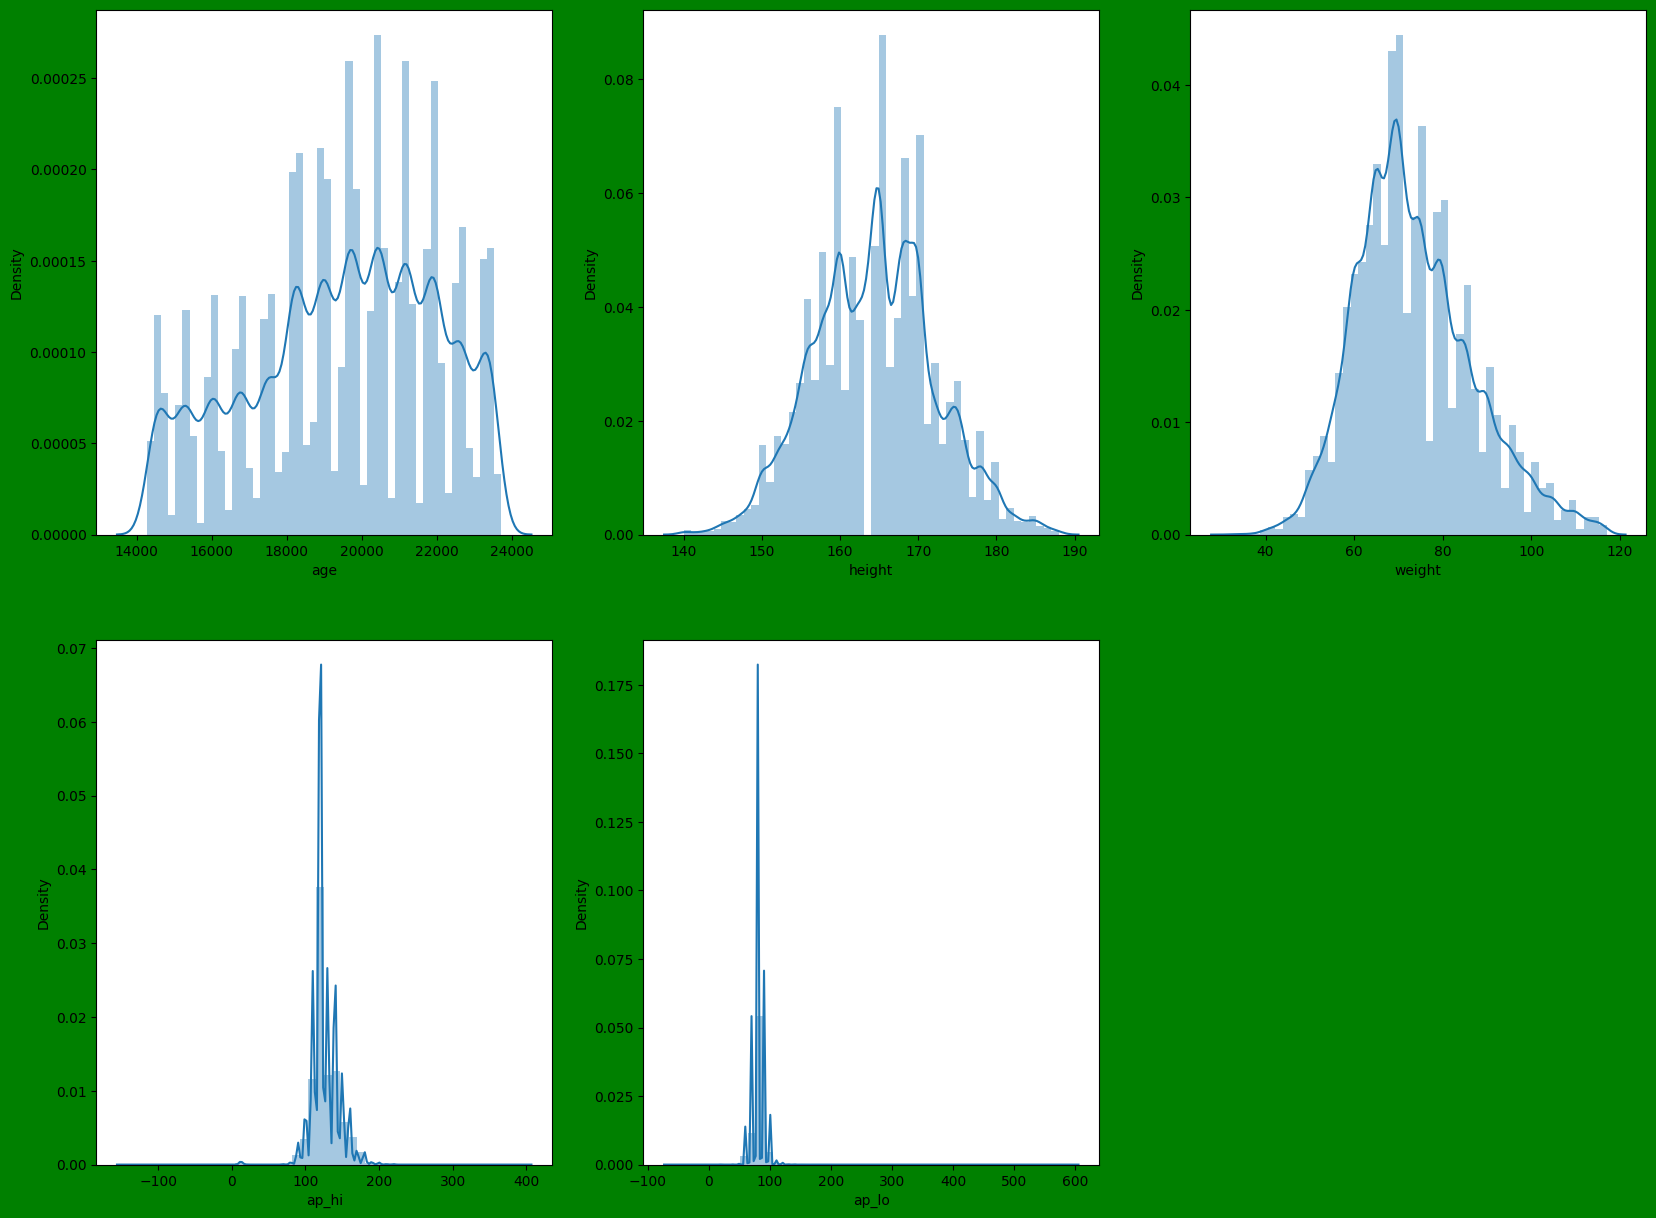

In [38]:
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1
for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

In [40]:
#use correlation matrix and plot heatmap to check multicollinearity or correlation between all variable (Refer Decision Tree algo for heat map)

#or


#use VIF to check if there is any multicollinearity(refer logistic regression for VIF)

In [42]:
#Cannot make out much from the above plots 
#Lets build Model

x=df.drop(columns=['cardio'])
y=df.cardio

In [45]:
#Split into Train Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [103]:
#Model Confidence/Accuracy
#cnn --> where we store our model

def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        train_pred=cnn.predict(x_train)
        print("=================Training Score===============")
        #actual vs predicted value
        print("Accuracy Score ==> ", accuracy_score(y_train,train_pred)*100)
        
    elif train==False:
        test_pred=cnn.predict(x_test)
        print("\n=================Testing Score===============")
        print("Accuracy Score ==> ", accuracy_score(y_test,test_pred)*100)
        print("\nClassification Report==>\n\n", classification_report(y_test,test_pred))

In [107]:
#Initiate DecisionTreeClassifier with new parameter and Train

random_clf =RandomForestClassifier()

In [109]:
#Train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [111]:
#Call the fucntion and pass dataset to check train and test score

#train score
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=True)
#testing score
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=False)

=================Training Score===============
Accuracy Score ==>  99.97452578774102

=================Testing Score===============
Accuracy Score ==>  70.98935982599495

Classification Report==>

               precision    recall  f1-score   support

           0       0.70      0.73      0.72      8588
           1       0.72      0.69      0.70      8423

    accuracy                           0.71     17011
   macro avg       0.71      0.71      0.71     17011
weighted avg       0.71      0.71      0.71     17011



Q: Our model is overfitted. How can we tune its parameters using GridSearchCV?

Ans: To address overfitting, we can use GridSearchCV to tune the model's parameters. Since Random Forest internally uses Decision Trees as its base estimator, most of the parameters we tune are related to the Decision Tree algorithm.

Additionally, there is one specific parameter unique to Random Forest: n_estimators, which specifies the number of Decision Trees to include in the forest. For example: "n_estimators": []. This parameter allows us to control how many trees are used in the ensemble.

## Lets tune the parameter using GridSearchCV

#### Hyperparamtere tuning: 
Hyperparameter tuning is the process of optimizing a model's configuration parameters (not learned from data) to improve its performance.

For example:

- In a Random Forest, parameters like n_estimators (number of trees) and max_depth (maximum depth of trees) can be tuned.
- Tools like GridSearchCV or RandomizedSearchCV systematically search through specified parameter values to find the best combination for your model.

In [113]:
#Random Forest Classifier 

#tuning only 5 different parameter among 20 parameters
#n_estimator --> number of decision trees we want
params={'n_estimators':[13,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,13],
       'min_samples_leaf':[5,8]}

grd=GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)

print("Best_Params ==> ", grd.best_params_)

Best_Params ==>  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [115]:
random_clf=grd.best_estimator_ #reinstantiating with best params
random_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=15)

In [117]:
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=False)
#Note - > You can improve the peformance by tweaking processing methods

=================Training Score===============
Accuracy Score ==>  74.97844489731933

=================Testing Score===============
Accuracy Score ==>  72.84110281582505

Classification Report==>

               precision    recall  f1-score   support

           0       0.70      0.80      0.75      8588
           1       0.76      0.66      0.71      8423

    accuracy                           0.73     17011
   macro avg       0.73      0.73      0.73     17011
weighted avg       0.73      0.73      0.73     17011



## Lets Plot ROC AUC Curve to choose best model.

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import roc_curve,roc_auc_score

In [127]:
#plot_roc_curve has been deprecated and removed in recent versions of scikit-learn. As of scikit-learn version 1.2.0, you should use RocCurveDisplay instead.
from sklearn.metrics import RocCurveDisplay

In [129]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [131]:
#Train Test Split
x=df.drop(columns=['cardio'],axis=1)
y=df.cardio

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=94062)

In [133]:
#Training with all classifiers
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)

#print after all models are trained
print("All Models are Trained")

All Models are Trained


## Lets Check ROC AUC Curve from the fitted Model
- True Positive Rate (TPR)=Out OF 100 actual cardio patients how many our model predicted as cardio patients correctly (Higher The Better)

- False Positive Rate (FPR)=How many people were predicted as cardio patients but in reality they were healthy (Lower the Better)

Since it is difficult to evaluate the score based on only TPR and FPR data. There comes AUC.

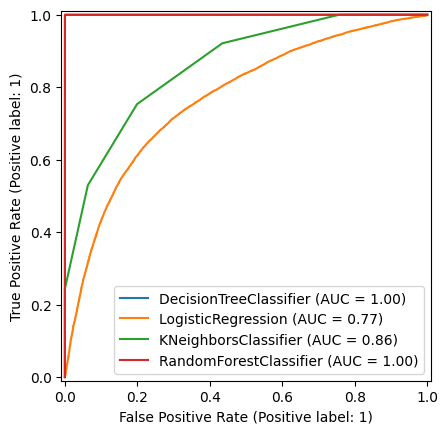

In [141]:
#How well our model works on training data .

#auc= area under the curve

#plot for all models

# Plot ROC curve for the first model
disp = RocCurveDisplay.from_estimator(dt, x_train, y_train)

# Add ROC curves for other models on the same axis
RocCurveDisplay.from_estimator(lr, x_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn, x_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf, x_train, y_train, ax=disp.ax_)

# Add legend and display the plot
plt.legend(prop={'size': 10}, loc='lower right')
plt.show()

In [ ]:
#out of 100% of data 

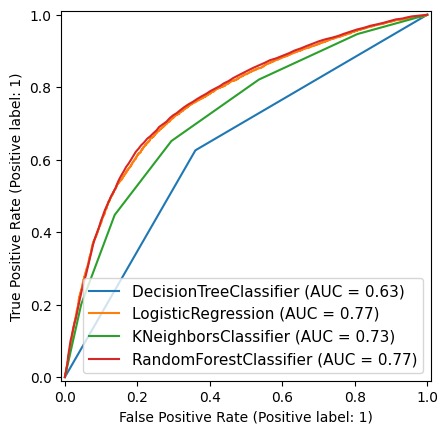

In [143]:
# Plot ROC curve for the first model
disp = RocCurveDisplay.from_estimator(dt, x_test, y_test)

# Add ROC curves for other models on the same axis
RocCurveDisplay.from_estimator(lr, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=disp.ax_)

# Add legend and display the plot
plt.legend(prop={'size': 11}, loc='lower right')
plt.show()